<a href="https://colab.research.google.com/github/mtofighi/Test/blob/master/Copy_of_avg_pop_cart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random as r
import collections
import matplotlib.pyplot as plt
from scipy.spatial import distance


dh=0.42
rmin=0
rmax=400
tmin = 0
tmax = 20
social_d = 2
pop =10000

itr = 10




def dist(l1,l2):
  return np.sqrt(l1[0]**2 + l2[0]**2 - 2*l1[0]*l2[0]*np.cos(l1[1] - l2[1]))


def dist2(l1,l2):
  return distance.euclidean(l1, l2)

def ci_calc(mtext,lsample):
  sigma = np.std(lsample)
  mean = np.mean(lsample)
  z= 1.96 #for CI = 95%
  error = z * (sigma/np.sqrt(len(lsample)))
  print(mtext,mean, "±" , error )

def iter_graph(title,llsample):
  plt.figure()
  ltemp = []
  for ii in range(len(llsample)):
    ltemp.append(np.mean(llsample[0:ii+1]))
  axes = plt.gca()
  #axes.set_ylim([0,pop])
  plt.title(title)
  plt.plot(np.arange(itr)+1,np.array(ltemp))

def polar_graph(human,l_r,l_t):
  l_r = np.array(l_r)
  l_t = np.array(l_t)
  area = dh*5
  colors = l_r
  fig = plt.figure(figsize=(20, 20), dpi=96)
  ax = fig.add_subplot(projection='polar')
  c = ax.scatter(l_t, l_r , s=area, cmap='hsv', alpha=1)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  #ax.grid(False)

In [ ]:
 l_c_t = []
 l_p_t = []
 l_max = []

 avg_contacts_pop_l = []
 min_contacts_pop_l = []
 max_contacts_pop_l = []

 for k in range(itr):
  n_err=0
  l = list()
  c_total = 0
  l_d = []
  l.append([r.uniform(rmin,rmax),r.uniform(tmin,tmax)])

  l_r = [l[0][0]]
  l_t = [l[0][1]]
  l_p = []
  i=0

  while i < pop-1:
    new= [r.uniform(rmin,rmax),r.uniform(tmin,tmax)]
    c_temp = 0
    d_new = []
    l_p_temp=[]

    for j in range(len(l)):
      d = dist2(l[j],new)
      if d<dh:
        new = []
        c_temp = 0
        d_new = []
        n_err= n_err+1
        break
      elif (d<social_d):
        c_temp = c_temp +1
        d_new.append(d)
        l_p_temp.append(j)
        l_p_temp.append(i)
      else:
        d_new.append(d)
    
    if (new):
      i+=1
      l.append(new)
      c_total = c_total + c_temp
      l_d.extend(d_new)
      l_p.extend(l_p_temp)
      l_r.append(new[0])
      l_t.append(new[1])
      
  l_c_t.append(c_total)
  l_p_t.append(len(set(l_p)))
  if (l_p):
    l_max.append(collections.Counter(l_p).most_common(1)[0][1])
    id_contact = collections.Counter(l_p).most_common()
    contacts = [x[1] for x in id_contact]
    if len(contacts)<pop:
      contacts.append(0)
    avg_contacts_pop_l.append(np.sum(contacts)/pop)
    min_contacts_pop_l.append(np.min(contacts))
    max_contacts_pop_l.append(np.max(contacts))
  else:
    l_max.append(-1)
    avg_contacts_pop_l.append(0)
    min_contacts_pop_l.append(0)
    max_contacts_pop_l.append(0)
print(n_err)
print(np.average(np.array(l_c_t)))
print(np.average(np.array(l_p_t)))
print(np.average(np.array(l_d)))
print("l_max_avg:", np.average(np.array(l_max)))
print(len(l_d))
print(len(set(l_p)))
print("Average contacts less than 2 m:", np.average(np.array(l_c_t)))
print("Average unique individuals at leas than 2 m", np.average(np.array(l_p_t)))
print("Average max contacts:", np.average(np.array(l_max)))

## Reporting 0.95 CI for populaion parameters based on samples
print("Nmumber of people in population: ",pop)
print("Number of experiment trials: ", len(l_p_t))
ci_calc("Avegrage unique contats: ",l_p_t)
ci_calc("Averag individual contacts: ",avg_contacts_pop_l)
ci_calc("Minimum individual contacts: ",min_contacts_pop_l)
ci_calc("Maximum individual contacts:: ",max_contacts_pop_l)

5525
72022.0
9999.0
133.80948079465327
l_max_avg: 27.8
49995000
9999
Average contacts less than 2 m: 72022.0
Average unique individuals at leas than 2 m 9999.0
Average max contacts: 27.8
Nmumber of people in population:  10000
Number of experiment trials:  10
Avegrage unique contats:  9999.0 ± 0.0
Averag individual contacts:  14.404399999999999 ± 0.018131769210973227
Minimum individual contacts:  0.0 ± 0.0
Maximum individual contacts::  27.8 ± 0.8677289899502032


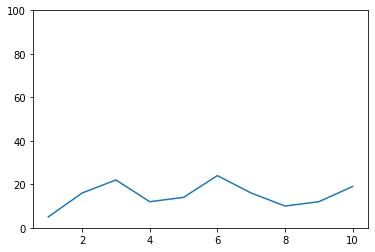

In [ ]:
axes = plt.gca()
axes.set_ylim([0,pop])
plt.plot(np.arange(itr)+1,np.array(l_p_t))

(0.0, 100.0)

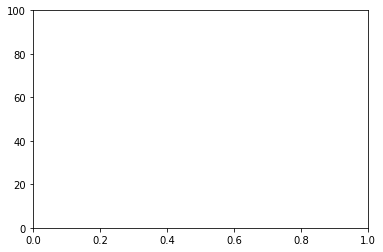

In [ ]:
axes = plt.gca()
axes.set_ylim([0,pop])

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
set(l_p)

{6, 11, 13, 15, 16, 21, 22, 30, 41, 46, 51, 58, 62, 64, 65, 69, 70, 85, 91}

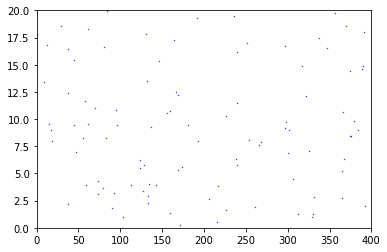

In [ ]:
l_r = np.array(l_r)
l_t = np.array(l_t)

area = .125
colors = l_r
ax = plt.gca()
ax.set_xlim([rmin,rmax])
ax.set_ylim([tmin,tmax])

ax.scatter(l_r, l_t, color = 'blue', s= 0.15)

In [ ]:
sum(np.array(l_d)<.5)

42

In [ ]:
np.average(np.array(l_d))

59.7258538662112

In [ ]:
c_total

7

In [ ]:
new = []

if new:
  print('h')

In [ ]:
l=[]
l.append([r.uniform(rmin,rmax),r.uniform(tmin,tmax)])
l_r = [l[0][0]]
l_t = [l[0][1]]
l

[[27.413111706998386, 2.7610534888368714]]

In [ ]:
l_t

[126.75672867962243]

In [ ]:

length = 1

coord_r = np.random.rand(length)*10
coord_alpha = np.random.rand(length)*np.pi


[[0.]]


In [ ]:
a = [1,2,3]
b = [4,5]
b.append(a)
b

[4, 5, [1, 2, 3]]

In [ ]:
def dist2(r1,r2,t1,t2):
  return np.sqrt(r1**2 + r2**2 - 2*r1*r2*np.cos(t1 - t2))

In [ ]:
dist([1,0],[1,np.pi/2])

1.414213562373095

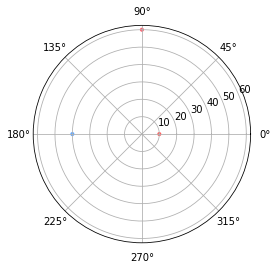

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Compute areas and colors
N = 5
l_r = np.array([10,60,40])
l_t = np.array([0,np.pi/2,np.pi])
area = 10
colors = l_r*100

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(l_t, l_r, c=colors, s=area, cmap='hsv', alpha=0.5)

In [ ]:
r 

[10, 60, 40]